In [103]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import numpy as np
import pandas as pd

# Question 1

$\begin{align*}
f(x_{i+1})  &= f(x_i) + f^{'}(x_i)h + \dfrac{f^{''}(x_i)}{2!}h^2 + \dots \tag{1}\\
f(x_{i-1})  &= f(x_i) - f^{'}(x_i)h + \dfrac{f^{''}(x_i)}{2!}h^2 + \dots \tag{2}\\
\\
\text{from (1) (2):}\\
f^{'}(x_i)  &= \dfrac{f(x_{i+1}) - f(x_{i-1})}{2h} - \dfrac{f^{(3)}(x_i)}{3!}h^2 + O(h^3) \\
f^{''}(x_i) &\cong \dfrac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2} \\
f^{(3)}(x_i)&\cong \dfrac{f^{''}(x_{i+1}) - f^{''}(x_{i-1})}{2h} \\
            &= \dfrac{1}{2h}\Big[\dfrac{f(x_{i+2}) - 2f(x_{i+1}) + f(x_i)}{h^2} - \dfrac{f(x_{i}) - 2f(x_{i-1}) + f(x_{i-2})}{h^2}\Big]\\
            &= \dfrac{f(x_{i+2}) - 2f(x_{i+1}) + 2f(x_{i-1}) - f(x_{i-2}) }{2h^3}\\
\therefore f^{'}(x_i) &\cong  \dfrac{f(x_{i+1}) - f(x_{i-1})}{2h} -  \dfrac{f(x_{i+2}) - 2f(x_{i+1}) + 2f(x_{i-1}) - f(x_{i-2}) }{12h^3}h^2  \\
            &= \dfrac{-f(x_{i+2}) + 8f(x_{i+1}) - 8f(x_{i-1}) + f(x_{i-2})}{12h} , Q.E.D.
\end{align*}$

# Question 2
### $f_1(x) = 0.2 + 25x − 200x^2 + 675x^3$ and $f_2(x) = 0.2 + 25x − 200x^2 + 675x^3 − 900x^4$

### 1. Change of variables: $x = 0.4+0.4x_d$ and $dx = 0.4d(x_d)$

### 2. $\int^{0.8}_0f(x)dx = \int^1_{-1}f(x_d)0.4d(x_d)$

### 3.
#### 3.1 $\int^{0.8}_0f_1(x)dx = 0.4 \times (f_1(x_d = \frac{-1}{\sqrt{3}}) + f_1(x_d = \frac{1}{\sqrt{3}})) \cong 43.1466666666667$ 
#### 3.2 $\int^{0.8}_0f_1(x)dx = 0.4 \times (f_2(x_d = \frac{-1}{\sqrt{3}}) + f_2(x_d = \frac{1}{\sqrt{3}})) \cong -14.197333333333347$ 

### 4.
#### 4.1 True value of integral of $f_1(x)$ in $[0,0.8] = 43.14666666666668$, relative error $\approx 0$
#### 4.2 True value of integral of $f_2(x)$ in $[0,0.8] = -15.83573333333333$, relative error $= 0.10346221204364707$

In [2]:
def q2_f_1(x):
    x = 0.4 + 0.4*x
    return 0.2 + 25*x - 200*(x**2) + 675 *(x**3) 

print((q2_f_1(-1/np.sqrt(3)) + q2_f_1(1/np.sqrt(3)))*0.4)

43.1466666666667


In [3]:
def q2_f_2(x):
    x = 0.4 + 0.4*x
    return 0.2 + 25*x - 200*(x**2) + 675 *(x**3) - 900*(x**4)

print((q2_f_2(-1/np.sqrt(3)) + q2_f_2(1/np.sqrt(3)))*0.4)

-14.197333333333347


In [4]:
def q2_f_1_int(x):
    return 0.2*x + (1/2)*25*(x**2) - (1/3)*200*(x**3) + (1/4)*675 *(x**4)
print(q2_f_1_int(0.8) - q2_f_1_int(0))

43.14666666666668


In [5]:
def q2_f_2_int(x):
    return 0.2*x + (1/2)*25*(x**2) - (1/3)*200*(x**3) + (1/4)*675 *(x**4) - (1/5)*900*(x**5)
print(q2_f_2_int(0.8) - q2_f_2_int(0))

-15.83573333333333


In [6]:
def relative_error(true_value, approx_value):
    return (true_value - approx_value)/true_value

print(relative_error(q2_f_1_int(0.8) - q2_f_1_int(0), (q2_f_1(-1/np.sqrt(3)) + q2_f_1(1/np.sqrt(3)))*0.4))
print(relative_error(q2_f_2_int(0.8) - q2_f_2_int(0), (q2_f_2(-1/np.sqrt(3)) + q2_f_2(1/np.sqrt(3)))*0.4))

-3.2936158950560874e-16
0.10346221204364707


# Question 3

## a.
#### Download csv from https://covidtracking.com/api & use mathplotlib to plot

In [81]:
data = pd.read_csv("https://covidtracking.com/api/v1/us/daily.csv").fillna(0)
data

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200607,56,1936161,18299517.0,1733.0,30299.0,216906.0,6493.0,8957.0,3298.0,...,2020-06-07T00:00:00Z,20237411,20235678,20235678,453,647,427219,19932,447151,5f6979262beb8a9cfd142ddfeb3cfaa94cab7e4f
1,20200606,56,1916229,17872298.0,1796.0,30909.0,216259.0,6754.0,8920.0,3476.0,...,2020-06-06T00:00:00Z,19790323,19788527,19788527,746,1007,517091,23062,540153,f2540c8d958b7647d63cbe7a50209e861aeaa260
2,20200605,56,1893167,17355207.0,1749.0,31335.0,215252.0,6912.0,8863.0,3523.0,...,2020-06-05T00:00:00Z,19250123,19248374,19248374,1100,1440,517298,28392,545690,8a6347d0d8e20dfede26ddd4265eb36923178d00
3,20200604,56,1864775,16837909.0,3474.0,31659.0,213812.0,7054.0,8787.0,3665.0,...,2020-06-04T00:00:00Z,18706158,18702684,18702684,884,-2828,439394,20540,459934,c93b7399aca9ff1af0861397b09744eb6586fe9c
4,20200603,56,1844235,16398515.0,3556.0,32081.0,216640.0,7224.0,8688.0,3749.0,...,2020-06-03T00:00:00Z,18246306,18242750,18242750,971,2258,438728,20063,458791,28c140c1abb0bdabfa257a8d2ca6ada1c15d6860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,20200126,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-26T00:00:00Z,1,1,1,0,0,0,0,0,defee0e146ae049c86c14a5e580c6219add8e92f
134,20200125,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-25T00:00:00Z,1,1,1,0,0,0,0,0,ca2013db2fa6a2b1a2c776b85d5fcd5e1ca64722
135,20200124,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-24T00:00:00Z,1,1,1,0,0,0,0,0,738e6d4a52f6d0895318ad9eda0d965d09feeb70
136,20200123,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-23T00:00:00Z,1,1,1,0,0,0,0,0,680d664781c7080c1171f160145dafc31e3b93af


In [145]:
tmp_data = pd.concat([pd.Series(np.zeros(6)),data['death']], ignore_index=True).to_numpy()
death_in_7_days = tmp_data[6:]
#death_in_7_days = tmp_data[0:-7] + tmp_data[1:-6] + tmp_data[2:-5] + tmp_data[3:-4] + tmp_data[4:-3] + tmp_data[5:-2] + tmp_data[6:-1] + tmp_data[7:]
for i in range(6):
    death_in_7_days += tmp_data[i:(i-6)]
average_death_in_7_days = (death_in_7_days/7)[::-1]
average_death_in_7_days = average_death_in_7_days[average_death_in_7_days.nonzero()]

In [153]:
average_death_in_7_days

array([2.85714286e-01, 5.71428571e-01, 1.14285714e+00, 2.14285714e+00,
       3.57142857e+00, 6.00000000e+00, 9.28571429e+00, 1.35714286e+01,
       1.92857143e+01, 2.71428571e+01, 3.62857143e+01, 4.77142857e+01,
       6.14285714e+01, 7.65714286e+01, 9.50000000e+01, 1.16285714e+02,
       1.39000000e+02, 1.64714286e+02, 1.94571429e+02, 2.28142857e+02,
       2.67714286e+02, 3.13714286e+02, 3.68714286e+02, 4.38857143e+02,
       5.24285714e+02, 6.38714286e+02, 7.80571429e+02, 9.68571429e+02,
       1.22257143e+03, 1.54657143e+03, 1.98000000e+03, 2.54028571e+03,
       3.25614286e+03, 4.16542857e+03, 5.33757143e+03, 6.80800000e+03,
       8.64214286e+03, 1.09134286e+04, 1.36714286e+04, 1.69802857e+04,
       2.08975714e+04, 2.55808571e+04, 3.10365714e+04, 3.73230000e+04,
       4.45404286e+04, 5.26520000e+04, 6.16745714e+04, 7.16738571e+04,
       8.26862857e+04, 9.46395714e+04, 1.07507571e+05, 1.21214571e+05,
       1.35653714e+05, 1.50805286e+05, 1.66616143e+05, 1.83049429e+05,
      

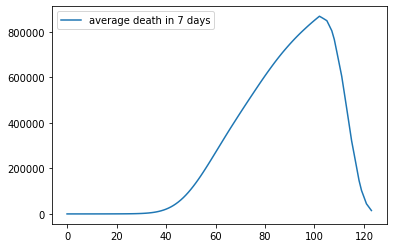

In [152]:
#x = data['date']
x = np.arange(len(average_death_in_7_days))
plt.plot(x,average_death_in_7_days, label='average death in 7 days')
plt.legend()

## b.
#### https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html